In [1]:
import pandas as pd 
import numpy as np
from numpy import dot, log
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation

### Read Data

In [2]:
df = pd.read_csv('Data/Quality.csv', names=['x1', 'x2', 'class'])
df

,x1,x2,class
0,0.051267,0.699560,1.0
1,-0.092742,0.684940,1.0
2,-0.213710,0.692250,1.0
3,-0.375000,0.502190,1.0
4,-0.513250,0.465640,1.0
...,...,...,...
113,-0.720620,0.538740,0.0
114,-0.593890,0.494880,0.0
115,-0.484450,0.999270,0.0
116,-0.006336,0.999270,0.0


### Generate new features

In order to generate new features, it is considered that the sum of powers of the first and second feature must add to 2-7. Power of one feature is determined based on the power of the other feature. The generated features are added to the dataset and used later. The 'class' column is also moved to the end.

In [3]:
i = 3
for j in range(2, 7):
    for k in range(0, j+1):
        col_name = 'x' + str(i)
        i += 1
        df[col_name] = df['x1']**(j-k) * df['x2']**k

In [4]:
new_cols = [col for col in df.columns if col != 'class'] + ['class']
df = df[new_cols]
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,class
0,0.051267,0.699560,0.002628,0.035864,0.489384,1.347453e-04,0.001839,0.025089,0.342354,6.907989e-06,...,1.227829e-02,1.675424e-01,1.815630e-08,2.477505e-07,3.380660e-06,4.613055e-05,6.294709e-04,8.589398e-03,1.172060e-01,1.0
1,-0.092742,0.684940,0.008601,-0.063523,0.469143,-7.976812e-04,0.005891,-0.043509,0.321335,7.397855e-05,...,-2.041205e-02,1.507518e-01,6.362953e-07,-4.699318e-06,3.470651e-05,-2.563226e-04,1.893054e-03,-1.398103e-02,1.032560e-01,1.0
2,-0.213710,0.692250,0.045672,-0.147941,0.479210,-9.760555e-03,0.031616,-0.102412,0.331733,2.085928e-03,...,-4.907685e-02,1.589699e-01,9.526844e-05,-3.085938e-04,9.995978e-04,-3.237900e-03,1.048821e-02,-3.397345e-02,1.100469e-01,1.0
3,-0.375000,0.502190,0.140625,-0.188321,0.252195,-5.273438e-02,0.070620,-0.094573,0.126650,1.977539e-02,...,-2.385083e-02,3.194040e-02,2.780914e-03,-3.724126e-03,4.987251e-03,-6.678793e-03,8.944062e-03,-1.197765e-02,1.604015e-02,1.0
4,-0.513250,0.465640,0.263426,-0.238990,0.216821,-1.352032e-01,0.122661,-0.111283,0.100960,6.939303e-02,...,-2.412849e-02,2.189028e-02,1.827990e-02,-1.658422e-02,1.504584e-02,-1.365016e-02,1.238395e-02,-1.123519e-02,1.019299e-02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.720620,0.538740,0.519293,-0.388227,0.290241,-3.742131e-01,0.279764,-0.209153,0.156364,2.696654e-01,...,-6.070482e-02,4.538330e-02,1.400354e-01,-1.046913e-01,7.826790e-02,-5.851357e-02,4.374511e-02,-3.270412e-02,2.444980e-02,0.0
114,-0.593890,0.494880,0.352705,-0.293904,0.244906,-2.094682e-01,0.174547,-0.145447,0.121199,1.244011e-01,...,-3.562096e-02,2.968243e-02,4.387691e-02,-3.656200e-02,3.046659e-02,-2.538737e-02,2.115493e-02,-1.762810e-02,1.468924e-02,0.0
115,-0.484450,0.999270,0.234692,-0.484096,0.998541,-1.136964e-01,0.234520,-0.483743,0.997812,5.508024e-02,...,-4.830370e-01,9.963553e-01,1.292688e-02,-2.666414e-02,5.499985e-02,-1.134476e-01,2.340073e-01,-4.826843e-01,9.956280e-01,0.0
116,-0.006336,0.999270,0.000040,-0.006332,0.998541,-2.544062e-07,0.000040,-0.006327,0.997812,1.612020e-09,...,-6.317918e-03,9.963553e-01,6.472253e-14,-1.020695e-11,1.609667e-09,-2.538495e-07,4.003286e-05,-6.313306e-03,9.956280e-01,0.0


In [5]:
df['class'] = df['class'].astype(int)

### Split data

To split the data, a function is written to first shuffle the data and take the first 100 data points for training and the last 18 for test. The data is also standardized as logistic regression works better on scaled data. What the function returns are the values within each splitted series as it is easier to work with numpy array.  

In [6]:
def standardize(X_train):
    for i in range(X_train.shape[1]):
        X_train[:, i] = (X_train[:, i] - np.mean(X_train[:, i])) / np.std(X_train[:, i])
    return X_train

def split_data(df):
    # Shuffle dataset 
    shuffle_df = df.sample(frac=1)
    X_ = shuffle_df.iloc[:, :27]
    y = shuffle_df.iloc[:, -1]
    X = pd.DataFrame(standardize(X_.values))
    
    train_size = int(0.85* len(df))
    
    X_train = X.iloc[:train_size,:].reset_index(drop=True)
    X_test = X.iloc[train_size:,:].reset_index(drop=True)
    y_train = y.iloc[:train_size].reset_index(drop=True)
    y_test = y.iloc[train_size:].reset_index(drop=True)
    return X_train.values, X_test.values, y_train.values, y_test.values

In [7]:
X_train, X_test, y_train, y_test = split_data(df)

In [8]:
X_train.shape

(100, 27)

## Model

### Ridge Regression

In [9]:
class ridge_regression():
    # the hyper parameters of the model are passed and stored in class's private values
    def __init__(self, epochs, alpha, lambda_):
        self.epochs = epochs
        self.alpha = alpha
        self.lambda_ = lambda_
        
    '''X values are augmented (adding a column of 1 in the begining) to fully vectorize calculation processes
        this way there is no need to add an explicit theta0 value. 
        an array of size number_of_features + 1 is initialized to zero to be updated in training stages''' 
    def initialize(self, X):
        X_ = np.ones((X.shape[0],X.shape[1]+1))
        X_[:,1:] = X
        theta_ = np.zeros((X_.shape[1], 1))
        return X_, theta_
    
    '''sigmoid function is implemented. This will then be used to calculate h(theta dot X)'''
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    '''cost function is calculated as the difference between real values and predictedd values
        this is to be minimized and therefore the gradient function is derived from it'''
    def cost_function(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        j = (1./2*m) * (((y - h).T @ (y- h)) + self.lambda_ * np.sum(np.square(theta)))
        return j
    
    '''gradient decsent formula is based on the cost function
        in each epoch, this function is called and theta values are subtracted from alpha*gradient_of_cost_function
        with respect to theta
        new values are returned to be used in later steps'''
    def gradient_descent(self, X, y, theta):
        m = len(y)
        h = self.sigmoid(np.dot(X, theta))
        theta = theta - self.alpha * (1/m)* ( np.dot(X.T, (h-y)) + self.lambda_ * theta )
        return theta
        
    '''the main application of this function is to loop for the number of epochs and calculate cost and 
        update theta according to gradient descent
        final weights are stored for prediction and also returned for plotting the decision boundary'''
    def fit(self, X_train, y_train):
        self.theta = []
        self.cost = []
        X, theta = self.initialize(X_train)
        for epoch in range(self.epochs):
            theta = self.gradient_descent(X, y_train, theta)
            cost = self.cost_function(X, y_train, theta)
        self.theta.append(theta)
        self.cost.append(cost)
        
        return self.theta
        
    '''taking the test set, it is normalized and it's product with theta is passed to sigmoid
        the values returned are assigned to classes using a thereshold of 0.5.'''
    def predict(self, X):
        pred = self.sigmoid(dot(self.initialize(X)[0],self.theta))
        l = []
        for p in pred:
            if p > 0.5:
                l.append(1)
            else:
                l.append(0)
        return l

In [35]:
'''an object is made from the model and fit for 8000 epochs, alpha = 0.001 and lambda = 0.01
    the hyper parameters have been choosed based on practice
    for instance, if number of epochs is decresed to 7900, the accuracy will be 83%'''
ridge_reg = ridge_regression(8000, 0.001, 0.01)
theta = np.array(ridge_reg.fit(X_train, np.reshape(y_train, (y_train.shape[0], 1))))

In [36]:
y_pred = ridge_reg.predict(X_test)

print("Training accuracy:", str(100 * np.mean(y_pred == y_test)) + "%")

Training accuracy: 88.88888888888889%


In [37]:
def compute_confusion_matrix(true, pred):
  K = len(np.unique(true)) # Number of classes 
  result = np.zeros((K, K))
  for i in range(len(true)):
    result[true[i]][pred[i]] += 1
  return result

In [38]:
y_test = y_test.astype(int)
cm = compute_confusion_matrix(y_test, y_pred)
print(cm)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

j1 = cm[0,0] / (cm[0,0] + cm[0,1] + cm[1,0])
j2 = cm[1,1] / (cm[1,1] + cm[1,0] + cm[0,1])

ACC = (TP+TN)/(TP+FP+FN+TN)
prec = TP/(TP+FP)
reca = TP/(TP+FN)
jacc = np.array([j1, j2])
f1_ = (2*TP) / (2*TP + FP + FN)

print('Accuracy: ', ACC)
print('Precision: ', prec)
print('Recall: ', reca)
print('Jaccard: ', jacc)
print('F1: ', f1_)

[[8. 2.]
 [0. 8.]]
Accuracy:  [0.88888889 0.88888889]
Precision:  [1.  0.8]
Recall:  [0.8 1. ]
Jaccard:  [0.8 0.8]
F1:  [0.88888889 0.88888889]


## Decision Boundary


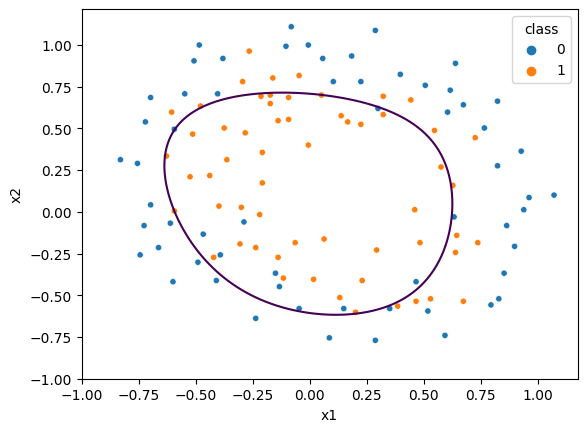

In [14]:
'''200 points with vlaues between -1 and 1 are created'''
x1 = np.linspace(-1, 1, 200)
x2 = np.linspace(-1, 1, 200)
'''the mesh grid of the points is created to be used for calculating decision boundary line equation'''
X1, X2 = np.meshgrid(x1, x2)

'''power of each x1 and x2 of the features are extracted'''
p1 = []
p2 = []
for j in range(1, 7):
    for k in range(0, j+1):
        p1.append(j-k)
        p2.append(k)

theta_ = np.reshape(theta, (theta.shape[1]))
'''the equation is stored in f
    the initial value of f is the theta_0 value'''
f = theta_[0]
'''loop over features and add the created multiplication to f
    the multiplication consists of X1 and X2 to the desired power times the coefficient theta[i]'''
for i in range(0, len(theta_)-1):
    f += theta_[i+1] * ((X1**p1[i])*(X2**p2[i]))
    
'''data points are plotted'''
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df.iloc[:,-1], legend='auto', s=20)
'''contour of f is create and plotted on data points'''
plt.contour(X1,X2,f, [-0.11])
plt.show()